# Feature Translation Service SWORD River Data Demo

This notebook shows a few example requests to the Feature Translation Service (FTS) Application Programming Interface (API).

## Required Dependencies

There are three python dependencies that must be available to the python kernel running this notebook. 

- plotly (https://pypi.org/project/plotly/)
- kaleido (https://pypi.org/project/kaleido/)
- geojson (https://pypi.org/project/geojson/)

The next cell installs them when the cell is run.

In [1]:
!pip install plotly geojson kaleido

In [2]:
import requests
import json
import geojson
import pprint
import plotly.graph_objects as go

from IPython.display import JSON, Image

def response_to_FeatureCollection(response):
    """
    This function will return a geojson.FeatureCollection representation of the features found
    in the provided response.
    Parameters
    ----------
    response : requests.Response
        Response object returned from a GET request on the FTS rivers endpoint.
    Returns
    -------
    geojson.FeatureCollection
        FeatureCollection containing all features extracted from the response.
    """
    featureList = []
    for reach_id, reach_json in response.json()['results'].items():
        reach_feature = geojson.loads(json.dumps(reach_json['geojson']))
        reach_feature['properties']={k:v for k,v in reach_json.items() if k not in ['geojson', 'geometry']}
        featureList.append(reach_feature)
    featureCollection = geojson.FeatureCollection(featureList)
    return featureCollection

def estimate_center_of_FeatureCollection(featureCollection):
    """
    This function does a very simplistic estimation of the center of all features in the given FeatureCollection.
    Parameters
    ----------
    featureCollection : geojson.FeatureCollection
        Estimate the center lon, lat of this FeatureCollection.
    Returns
    -------
    tuple(float, float)
        Estimated center longitude, center latitude
    """
    lats = [xy[1] for feature in featureCollection['features'] for xy in feature['coordinates']]
    lons = [xy[0] for feature in featureCollection['features'] for xy in feature['coordinates']]

    center_lat = (min(lats) + max(lats)) / 2
    center_lon = (min(lons) + max(lons)) / 2
    
    return center_lon, center_lat

In [11]:
response = requests.get("https://fts.podaac.earthdata.nasa.gov/rivers/reach/74230900271")

featureCollection = response_to_FeatureCollection(response)

pprint.pprint(response.json(), compact=True, width=60, depth=2)

{'hits': 1,
 'results': {'74230900271': {...}},
 'search on': {'exact': False,
               'page_number': 1,
               'page_size': 100,
               'parameter': 'reach'},
 'status': '200 OK',
 'time': '4.953 ms.'}


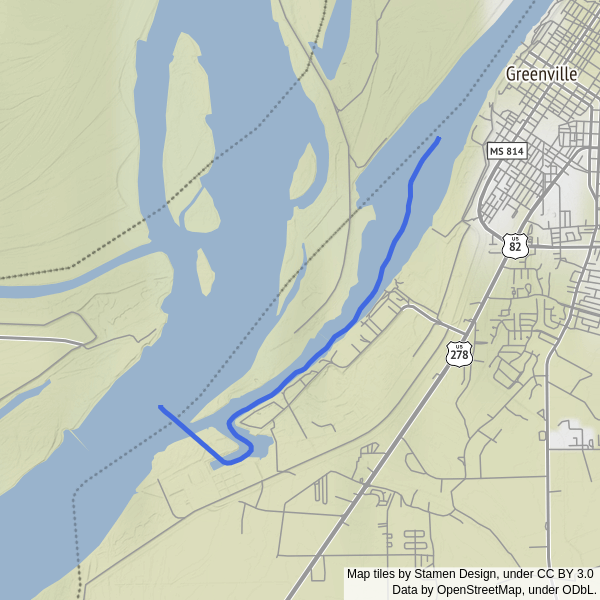

In [4]:

fig = go.Figure(
    go.Scattermapbox(),
    layout = {
        'mapbox': {
            'style': "stamen-terrain",
            'zoom': 12
        },
        'margin': {'l':0, 'r':0, 'b':0, 't':0},
    }
)

fig.update_mapboxes(layers=[
    {
        'source': feature, 
        'type': "line", 
        'line': {'width': 5},
        'below': "traces", 
        'color': "royalblue"
    } for feature in featureCollection.features])

center_lon, center_lat = estimate_center_of_FeatureCollection(featureCollection)

fig.update_layout(
    mapbox = {
        'center': { 'lon':  center_lon, 'lat': center_lat}
    }
)

Image(fig.to_image(format="png", width=600, height=600))

In [ ]:
features = [geojson.loads(r['geojson']) for rid, r in reaches.json()['results'].items()]
featureCollection = geojson.FeatureCollection(features)


fig = go.Figure(go.Scattermapbox(mode='lines'))

fig.update_layout(
    mapbox = {
        'center': { 'lon': 42.58826463170101, 'lat': -0.06657401863412468},
        'zoom': 7, 'layers': [{
            'source': dict(featureCollection),
            'type': "fill", 'below': "traces", 'color': "royalblue"}]})

fig.show()


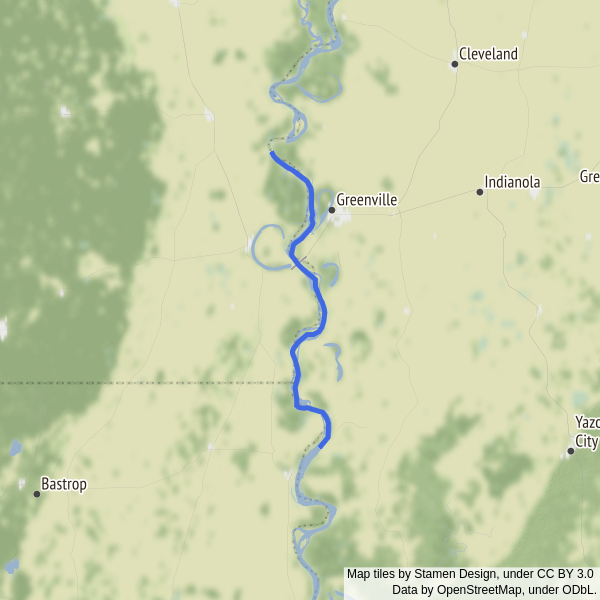

In [6]:
fig = go.Figure(
    go.Scattermapbox(),
    layout = {
        'mapbox': {
            'style': "stamen-terrain",
            'zoom': 8
        },
        'margin': {'l':0, 'r':0, 'b':0, 't':0},
    }
)

fig.update_mapboxes(layers=[
    {
        'source': feature, 
        'type': "line", 
        'line': {'width': 5},
        'below': "traces", 
        'color': "royalblue"
    } for feature in featureCollection.features])

center_lon, center_lat = estimate_center_of_FeatureCollection(featureCollection)

fig.update_layout(
    mapbox = {
        'center': { 'lon':  center_lon, 'lat': center_lat}
    }
)

Image(fig.to_image(format="png", width=600, height=600))

In [7]:
response = requests.get("https://fts.podaac.earthdata.nasa.gov/rivers/node/74230900100")

featureCollection = response_to_FeatureCollection(response)

pprint.pprint(response.json(), compact=True, width=180)

{'hits': 67,
 'results': {'74230900100011': {'dist_out': 893320,
                                'facc': 2913320.0,
                                'geojson': {'coordinates': [-91.094707, 32.864911], 'type': 'Point'},
                                'geometry': 'POINT (-91.09470699357992 32.86491137855101)',
                                'grod_id': 0,
                                'n_chan_max': 1,
                                'n_chan_mod': 1,
                                'netcdf_origin': 'na_apriori_rivers_v08.nc',
                                'node_id': '74230900100011',
                                'node_len': 204.117,
                                'reach_id': '74230900101',
                                'shp_origin': 'na_apriori_rivers_nodes_hb74_v08.shp',
                                'type': 1,
                                'width': 1410.0,
                                'wse': 25.6,
                                'wse_var': 0.06,
                        

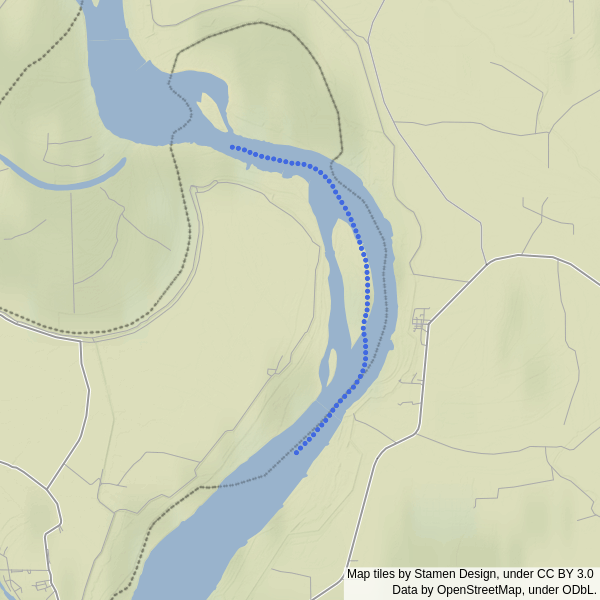

In [8]:

fig = go.Figure(
    go.Scattermapbox(),
    layout = {
        'mapbox': {
            'style': "stamen-terrain",
            'zoom': 11
        },
        'margin': {'l':0, 'r':0, 'b':0, 't':0},
    }
)

fig.update_mapboxes(layers=[
    {
        'source': feature, 
        'type': "circle", 
        'circle': {'radius': 3},
        'below': "traces", 
        'color': "royalblue"
    } for feature in featureCollection.features])

lats = [feature['coordinates'][1] for feature in featureCollection['features']]
lons = [feature['coordinates'][0] for feature in featureCollection['features']]

center_lat = (min(lats) + max(lats)) / 2
center_lon = (min(lons) + max(lons)) / 2

fig.update_layout(
    mapbox = {
        'center': { 'lon':  center_lon, 'lat': center_lat}
    }
)

Image(fig.to_image(format="png", width=600, height=600))